<a href="https://colab.research.google.com/github/ravinasha/mac/blob/main/MUSIC_RECOMMDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MUSIC RECOMMDATION SYSTEM**

Spotify's recommendation system, powered by machine
learning, predicts a user's likelihood of repeatedly listening to a
song within a set timeframe. Using a dataset with 1 indicating
repeated plays within a month, it tracks user song histories and
timestamps to generate personalized song recommendations.

In [39]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")


In [40]:
df = pd.read_csv("/content/data.csv")
genre_data = pd.read_csv('/content/data_by_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

In [41]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [42]:
df.shape

(170653, 19)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [44]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
170648    False
170649    False
170650    False
170651    False
170652    False
Length: 170653, dtype: bool

In [45]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [46]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [47]:
genre_data.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [48]:
genre_data.shape

(2973, 14)

In [49]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)

In [50]:
import numpy as np

print("Checking for NaNs in X:", np.isnan(X).sum())
print("Checking for Infs in X:", np.isinf(X).sum())
print("Checking for NaNs in y:", np.isnan(y).sum())
print("Checking for Infs in y:", np.isinf(y).sum())


Checking for NaNs in X: acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
explicit            0
key                 0
mode                0
year                0
dtype: int64
Checking for Infs in X: acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
explicit            0
key                 0
mode                0
year                0
dtype: int64
Checking for NaNs in y: 0
Checking for Infs in y: 0


In [51]:
print("After cleaning:")
print("Checking for NaNs in X:", np.isnan(X).sum())
print("Checking for Infs in X:", np.isinf(X).sum())
print("Checking for NaNs in y:", np.isnan(y).sum())
print("Checking for Infs in y:", np.isinf(y).sum())


After cleaning:
Checking for NaNs in X: acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
explicit            0
key                 0
mode                0
year                0
dtype: int64
Checking for Infs in X: acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
explicit            0
key                 0
mode                0
year                0
dtype: int64
Checking for NaNs in y: 0
Checking for Infs in y: 0


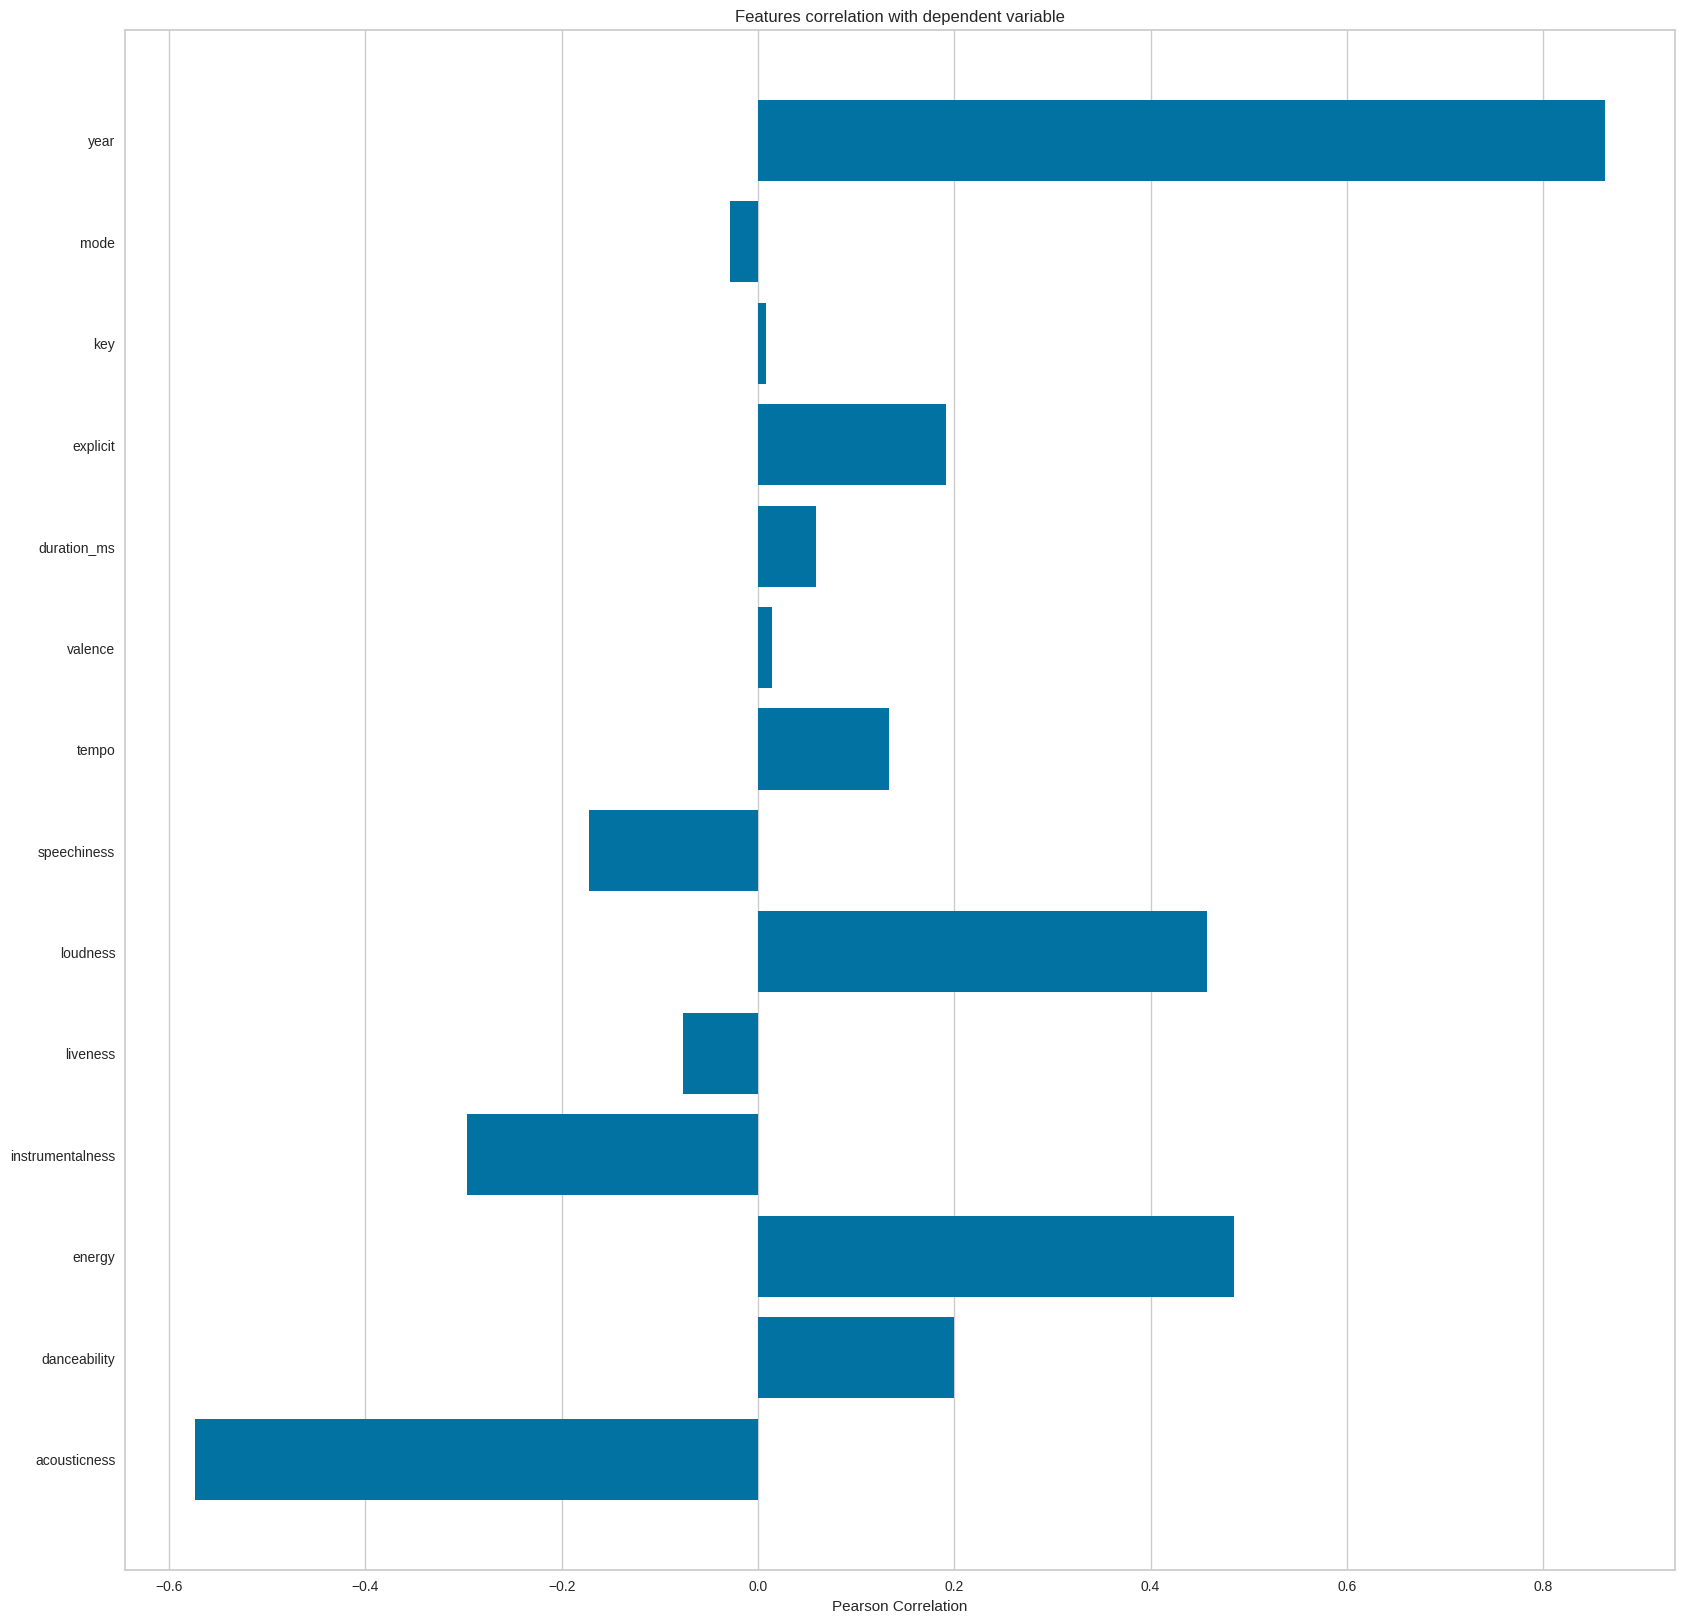

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [52]:
visualizer.fit(X, y)
visualizer.show()


<Axes: xlabel='count', ylabel='decade'>

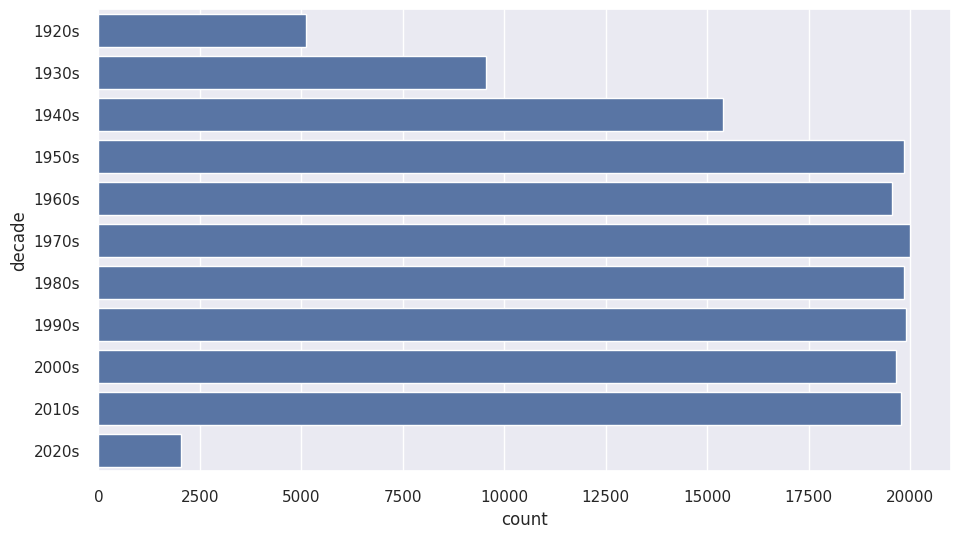

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(df['decade'])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 170653 samples in 0.430s...
[t-SNE] Computed neighbors for 170653 samples in 383.945s...
[t-SNE] Computed conditional probabilities for sample 1000 / 170653
[t-SNE] Computed conditional probabilities for sample 2000 / 170653
[t-SNE] Computed conditional probabilities for sample 3000 / 170653
[t-SNE] Computed conditional probabilities for sample 4000 / 170653
[t-SNE] Computed conditional probabilities for sample 5000 / 170653
[t-SNE] Computed conditional probabilities for sample 6000 / 170653
[t-SNE] Computed conditional probabilities for sample 7000 / 170653
[t-SNE] Computed conditional probabilities for sample 8000 / 170653
[t-SNE] Computed conditional probabilities for sample 9000 / 170653
[t-SNE] Computed conditional probabilities for sample 10000 / 170653
[t-SNE] Computed conditional probabilities for sample 11000 / 170653
[t-SNE] Computed conditional probabilities for sample 12000 / 170653
[t-SNE] Computed conditional proba

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

song_cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=20, verbose=False))
], verbose=False)


In [23]:
X = df.select_dtypes(np.number)
number_cols = list(X.columns)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
X = df.select_dtypes(np.number)
number_cols = list(X.columns)
pca_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change 'mean' to 'median' or 'most_frequent'
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = df['name']
print(projection.head())


          x         y                                              title
0  3.797947  3.143748  Piano Concerto No. 3 in D Minor, Op. 30: III. ...
1  1.435825 -3.347112                            Clancy Lowered the Boom
2  3.556922  2.321578                                          Gati Bali
3  2.411759  0.926545                                          Danny Boy
4  2.480094  0.249200                        When Irish Eyes Are Smiling


In [27]:
!pip install spotipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.1/252.1 kB 9.0 MB/s eta 0:00:00


In [31]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

os.environ["SPOTIFY_CLIENT_ID"] = 'your_client_id'
os.environ["SPOTIFY_CLIENT_SECRET"] = 'your_client_secret'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=os.environ["SPOTIFY_CLIENT_ID"],
    client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]
))


In [32]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


In [33]:
def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)



In [34]:
def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


In [35]:
def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [38]:
def get_song_data(song, spotify_data):
    try:

        matching_songs = spotify_data[(spotify_data['name'] == song['name']) & (spotify_data['year'] == song['year'])]
        if not matching_songs.empty:
            song_data = matching_songs.iloc[0]
        else:
            raise IndexError
    except IndexError:
        song_data = find_song(song['name'], song['year'])
    return song_data

def find_song(name, year):
    print(f"Song {name} from year {year} not found in the dataset.")
    return None

spotify_data = pd.DataFrame({
    'name': ['Song1', 'Song2'],
    'year': [2020, 2021]
})

song = {'name': 'Song1', 'year': 2020}
print(get_song_data(song, spotify_data))

song = {'name': 'Song3', 'year': 2022}
print(get_song_data(song, spotify_data))


name    Song1
year     2020
Name: 0, dtype: object
Song Song3 from year 2022 not found in the dataset.
None
